<a href="https://colab.research.google.com/github/linyu3294/cs6220-data-minning-hw/blob/main/cs6220_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
## **LOAD DATA: MNIST, SPAMBASE, 20NG**


**Parser Function used for Spambase Dataset**

**Importing MNIST Dataset**

In [ ]:
from keras.datasets import mnist 
import numpy as np
from sklearn.preprocessing import normalize

# load mnist data
(mnist_train, mnist_train_labels), (mnist_test, mnist_test_labels) = mnist.load_data()

# reshape and normalize
mnist_train = np.reshape(mnist_train, (60000, 784)) 
mnist_train = normalize(mnist_train, norm ='max')
mnist_test = np.reshape(mnist_test, (10000, 784))
mnist_test = normalize(mnist_test, norm ='max') 


11493376/11490434 [==============================] - 0s 0us/step


**Importing 20 NG Dataset**

In [ ]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.sparse import csr_matrix

# same normalization parameters just transform 
train_set = fetch_20newsgroups(subset='train')
ng_train = train_set.data
ng_train_labels = train_set.target
test_set = fetch_20newsgroups(subset='test')
ng_test = test_set.data
ng_test_labels = test_set.target


# normalize data
vectorizer = TfidfVectorizer()
ng_train = csr_matrix(vectorizer.fit_transform(ng_train)).todense()
ng_test = csr_matrix(vectorizer.transform(ng_test)).todense()

In [ ]:
import numpy as np

def parse_data (infile, num_features) -> np.array :
  max_news_index = 0;

  infile = open(infile, "r")
  all_data = infile.read()
  lines = all_data.splitlines()

  X = []
  X_target = []
  for line in lines:
    if line:
      datapoint_vector = []
      for f in range(num_features):
        val = line.split(',')[f]
        if (' ' in val):continue
        else:
          float_val = float(val)
          datapoint_vector.append(float_val)
      datapoint_vector.append(float(line.strip()[-1:]))
      X.append(datapoint_vector)

  return np.array(X)


---
## **PROBLEM 1: Supervised Classification**


6 Runs of Supervised Training / Testing : 3 datasets (MNIST, Spambase, 20NG) x 2 Classification Algorithms (L2-reg Logistic Regression, Decision Trees). You can use a library for the classification algorithms, and also can use any library/script to process data in appropriate formats.

You are required to explain/analyze the model trained in terms of features : For each of the 6 runs list the top F=30 features. 

For the Regression these correspond to the highest-absolute-value F coefficients.

For Decision Tree they are the first F splits. In particular for Decision Tree on 20NG, report performance for two tree sizes ( by depths of the tree, or number of leaves, or number of splits )



**Logistic Regression - MNIST Dataset**

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix

mnist_train = mnist_train[:10000]
mnist_train_labels = mnist_train_labels[:10000]

l=lr(solver='lbfgs', max_iter=100000).fit(mnist_train ,mnist_train_labels)
results = l.predict(mnist_test)

cm = confusion_matrix(mnist_test_labels, results)
print('Confusion Matrix\n', '\n', cm, '\n')
score = l.score(mnist_test, mnist_test_labels)
print("Accuracy of Logistic Prediction : ", score , '\n')


print('Top Features : \n')
print( np.argsort(np.absolute(l.coef_[0]))[:30] )

Confusion Matrix
 
 [[ 940    0    7    2    0   14    9    2    4    2]
 [   0 1104    6    3    1    3    4    2   12    0]
 [   4   13  899   17    8    7   15   12   51    6]
 [   4    1   26  900    2   33    4   12   19    9]
 [   2    4    6    1  903    1   15    5    9   36]
 [   9    2    5   47    9  752   16    2   38   12]
 [   7    3   11    1   14   16  900    3    3    0]
 [   0   11   21    9    8    1    0  945    5   28]
 [   5   15   13   29    7   30   12   11  836   16]
 [   6    9    2   10   53   10    1   42    7  869]] 

Accuracy of Logistic Prediction :  0.9048 

Top Features : 

[  0 560 533 532 504 476 448 420 419 392 782 364 336 308 280 588 169 141
 140 139 114 113 112 111 110 109  87  86  85  84]


**Logistic Regression - 20 News Group Dataset**

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix

ng_train = ng_train[:1000]
ng_train_labels = ng_train_labels[1000:2000]
ng_test = ng_test[:1000]
ng_test_labels = ng_test_labels[1000:2000]

l = lr(solver='lbfgs', max_iter=100000).fit(ng_train ,ng_train_labels)
results = l.predict(ng_test)

cm = confusion_matrix(ng_test_labels, results)
print('Confusion Matrix\n', '\n', cm, '\n')
score = l.score(ng_test, ng_test_labels)
print("Accuracy of Logistic Prediction : ", score , '\n')

print('Top Coefficients : \n')
for i in range(len(l.coef_)):
  print('Class ' ,  i, ' : ', np.argsort(np.absolute(l.coef_[i]))[:30] )

Confusion Matrix
 
 [[ 0  0  5  1  0  1  2  1 15  0  3  3  1  1  0  0  9  0  0  0]
 [ 0  0  5  2  1  3  1  3  9  2  8  4 11  3  0  1 13  0  0  0]
 [ 0  2  2  0  0  0  1  1 12  0  8  6  5  3  0  0  9  0  0  0]
 [ 0  0 13  1  0  3  1  1 20  0  7  3  7  0  0  0 11  0  0  0]
 [ 0  2  3  2  0  0  0  3 11  1  4  3  2  1  0  2 11  3  0  0]
 [ 0  0  4  1  1  4  0  2 15  0  3  1  6  0  0  0 11  0  0  0]
 [ 0  0  4  2  0  2  1  2 15  0  6  3  8  1  0  1 12  0  0  0]
 [ 0  0  5  0  1  0  0  1 11  1  6  2  7  1  0  0  8  0  0  0]
 [ 0  0  4  0  0  0  2  2 14  2  4  1  5  2  0  0  8  0  0  0]
 [ 0  0 12  2  0  0  2  4 14  1  7  1  3  0  0  0 10  0  0  0]
 [ 0  0  5  0  0  1  1  0 12  1  3  1  4  1  0  0 14  0  0  0]
 [ 0  0 11  0  0  2  2  3 15  0  6  4  8  2  0  0  8  0  0  0]
 [ 0  0  3  2  1  1  1  0 12  0  4  3  4  2  0  0 14  0  1  0]
 [ 0  0  6  2  0  1  2  2 16  0  7  3  4  2  0  0  7  0  0  0]
 [ 0  0  7  2  0  0  2  1 16  0  4  1  4  3  0  2 15  1  0  0]
 [ 0  0  9  0  0  3  2  0 11  1  6 

**Logistic Regression - Spam Base Dataset**

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix
from numpy import random

infile = '/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/spambase.data'

parsed_data = parse_data(infile,57)
random.shuffle(parsed_data) 

spam_data = np.split(parsed_data, [57], axis = 1)[0]
spam_labels = np.split(parsed_data, [57], axis = 1)[1]


spam_train_data = spam_data[4000:] 
spam_train_labels = spam_labels[4000:]
spam_test_data = spam_data[:4000]
spam_test_labels = spam_labels[:4000]

print (np.unique(spam_test_labels))

l=lr(solver='liblinear',  max_iter=100000).fit(spam_train_data,spam_train_labels.ravel())
results = l.predict(spam_test_data)

cm = confusion_matrix(spam_test_labels, results)
print('Confusion Matrix\n', '\n', np.array([['TP', 'FP'], ['FN', 'TN']]), '\n\n', cm, '\n')

score = []
for i in range(len(spam_test_labels)):
  if (results[i] == spam_test_labels[i]):
    score.append(1)
  else: score.append(0)
print("Accuracy of Logistic Prediction : ", sum(score)/len(score), '\n')


print('Top Coefficients : \n')
for i in range(len(l.coef_)):
  print('Class ' ,  i, ' : ', np.argsort(np.absolute(l.coef_[i]))[:30] )

[0. 1.]
Confusion Matrix
 
 [['TP' 'FP']
 ['FN' 'TN']] 

 [[2272  172]
 [ 153 1403]] 

Accuracy of Logistic Prediction :  0.91875 

Top Coefficients : 

Class  0  :  [55 56 33 31 46  2 49 13 17  9  1 53 42 18 37  7 12 21 54  3  8 27  5 29
 11 15 32 36 50 20]


---
## **PROBLEM 2 : PCA library on MNIST**



---
### **Section A**
For MNIST dataset, run a PCA-library to get data on D=5 features. Rerun the classification tasks from PB1, compare testing performance with the one from PB1. Then repeat this exercise for D=20


In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

# load mnist data
(mnist_train, mnist_train_labels), (mnist_test, mnist_test_labels) = mnist.load_data()

# reshape and normalize
mnist_train = np.reshape(mnist_train, (60000, 784)) 
mnist_train = normalize(mnist_train, norm ='max')
mnist_test = np.reshape(mnist_test, (10000, 784))
mnist_test = normalize(mnist_test, norm ='max') 

pca = PCA(n_components=5)
mnist_train_reduced = pca.fit_transform(mnist_train)
mnist_test_reduced = pca.transform(mnist_test)

l=lr(solver='lbfgs', max_iter=100000).fit(mnist_train_reduced, mnist_train_labels)
results = l.predict(mnist_test_reduced)

cm = confusion_matrix(mnist_test_labels, results)
print('Confusion Matrix\n', '\n', cm, '\n')
score = l.score(mnist_test_reduced, mnist_test_labels)
print("Accuracy of Logistic Prediction : ", score , '\n')


Confusion Matrix
 
 [[ 868    0    4    1    1   68   13    1   24    0]
 [   0 1066   35    6    0    0    2    6   19    1]
 [  37   37  555   45   34   19  248    2   52    3]
 [   6   14   32  724    7   97    5   10  103   12]
 [   1    9    1    0  666    3   49   34   17  202]
 [  28   19   22  196   14  464   33   73   33   10]
 [  31   16  173    3   44   14  641    1   35    0]
 [   5   36   11    1   53   17    7  748   34  116]
 [  17   13   50  129   15   61   13    2  614   60]
 [  17   14    0    7  244   10   15  147   25  530]] 

Accuracy of Logistic Prediction :  0.6876 



In [ ]:
# load mnist data
(mnist_train, mnist_train_labels), (mnist_test, mnist_test_labels) = mnist.load_data()

# reshape and normalize
mnist_train = np.reshape(mnist_train, (60000, 784)) 
mnist_train = normalize(mnist_train, norm ='max')
mnist_test = np.reshape(mnist_test, (10000, 784))
mnist_test = normalize(mnist_test, norm ='max') 

pca = PCA(n_components=20)
mnist_train_reduced = pca.fit_transform(mnist_train)
mnist_test_reduced = pca.transform(mnist_test)

l=lr(solver='lbfgs', max_iter=100000).fit(mnist_train_reduced, mnist_train_labels)
results = l.predict(mnist_test_reduced)

cm = confusion_matrix(mnist_test_labels, results)
print('Confusion Matrix\n', '\n', cm, '\n')
score = l.score(mnist_test_reduced, mnist_test_labels)
print("Accuracy of Logistic Prediction : ", score , '\n')


Confusion Matrix
 
 [[ 942    0    6    6    0   15    7    1    3    0]
 [   0 1101    4    2    0    2    3    1   22    0]
 [  12   13  868   19   18    6   29   15   39   13]
 [   4    0   25  881    1   40    2   18   29   10]
 [   2    5    6    1  876    6   12    3    9   62]
 [  11    4    8   56   15  720   22   11   30   15]
 [  17    4   15    2   22   20  873    1    4    0]
 [   6    9   37    4   11    1    0  917    4   39]
 [  12   12   16   44   10   47   15    6  790   22]
 [   8    8   13   12   65   21    0   30   12  840]] 

Accuracy of Logistic Prediction :  0.8808 



---
### **Section B**
Run PCA library on Spambase and repeat one of the classification algorithms. What is the smallest D (number of PCA dimmesnsions) you need to get a comparable test result?


In [ ]:
from sklearn.decomposition import PCA
from numpy import random
infile = '/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/spambase.data'

parsed_data = parse_data(infile,57)
random.shuffle(parsed_data)

spam_data = np.split(parsed_data, [57], axis = 1)[0]
spam_labels = np.split(parsed_data, [57], axis = 1)[1]

pca = PCA(n_components=2)
pca.fit(spam_data)
print('Explained Ratios : ' , np.sum(pca.explained_variance_ratio_), '\n')
print('Sum of Explained Ratio : ' , np.sum(pca.explained_variance_ratio_), '\n')
print(pca.components_, '\n')




Explained Ratios :  0.9980699846892176 

Sum of Explained Ratio :  0.9980699846892176 

[[ 4.47943057e-05 -4.64073749e-05  6.07026243e-05  4.99124584e-05
   5.66182598e-06  3.77491113e-05 -3.19313960e-06  2.68921661e-05
   1.14431923e-04  9.49479917e-05  3.82750630e-05  2.90277874e-05
   5.12866156e-05  9.17404205e-05  6.69569738e-05  5.80240960e-06
   4.76408967e-05  4.24407383e-05 -1.96457992e-05  6.55821095e-05
   1.07387850e-04  1.71608301e-04  9.58902045e-05  5.85623327e-05
  -1.21995893e-04 -8.77766868e-05 -5.31383955e-04 -5.95326240e-05
  -5.50578275e-05 -4.79684322e-05 -3.03314319e-05 -2.51679065e-05
   4.87736071e-06 -2.39592620e-05 -4.01818244e-05 -3.05551556e-05
  -3.53856011e-06 -5.04317027e-06 -3.50487385e-05 -1.61364440e-05
  -1.58391819e-05 -7.10070122e-05 -1.33014529e-05 -4.14946009e-05
  -1.57658623e-04 -6.96164426e-05  5.58281761e-07 -4.95859004e-06
   2.22025048e-05  5.66197658e-05  9.13922528e-07  5.23786441e-05
   8.26064255e-05  3.12400471e-05  9.51836857e-03  1.6

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix
from numpy import random

infile = '/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/spambase.data'

parsed_data = parse_data(infile,57)
random.shuffle(parsed_data) 

spam_data = np.split(parsed_data, [57], axis = 1)[0]
spam_labels = np.split(parsed_data, [57], axis = 1)[1]

pca = PCA(n_components=2)
spam_train_reduced = pca.fit_transform(spam_train_data)
spam_test_reduced = pca.fit_transform(spam_test_data)

l=lr(solver='liblinear', max_iter=100000).fit(spam_train_reduced,spam_train_labels.ravel())
results = l.predict(spam_test_reduced)

cm = confusion_matrix(spam_test_labels, results)
print('Confusion Matrix\n', '\n', np.array([['TP', 'FP'], ['FN', 'TN']]), '\n\n', cm, '\n')

score = []
for i in range(len(spam_test_labels)):
  if (results[i] == spam_test_labels[i]):
    score.append(1)
  else: score.append(0)
print("Accuracy of Logistic Prediction : ", sum(score)/len(score), '\n')


print('Top Features : \n')
for i in range(len(l.coef_)):
  print('Class ' ,  i, ' : ', np.argsort(np.absolute(l.coef_[i]))[:30] )

Confusion Matrix
 
 [['TP' 'FP']
 ['FN' 'TN']] 

 [[2236  208]
 [ 934  622]] 

Accuracy of Logistic Prediction :  0.7145 

Top Features : 

Class  0  :  [0 1]




---
### **OPTIONAL (no credit) : PCA for cluster visualization**
A) Run KMeans on MNIST data (or a sample of it)

B) Run PCA on same data

C) Plot data in 3D with PCA representation with t=3 top eigen values; use shapes to to indicate truth digit label (circle, triangle, "+", stars, etc) and colors to indicate cluster ID (red blue green etc).

D) Select other 3 at random eigen values from top 20; redo the plot several times.


---
## **PROBLEM 3 : Implement PCA on MNIST**

Repeat problem 2 exercises on MNIST (D=5 and D=20) with your own PCA implementation. You can use any built-in library/package/API for : matrix storage/multiplication, covariance computation, eigenvalue or SVD decomposition, etc. Matlab is probably the easiest language for implementing PCA due to its excellent linear lagenbra support.

This is a simple example demonstrating PCA implementation on a tiny dataset

In [ ]:

from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
print('define a training matrix')
A = array([[1, 2], [3, 4], [5, 6]])

print(A, '\n')
print('calculate the mean of each column')
M = mean(A.T, axis=1)
print(M, '\n')
print('center columns by subtracting column means')
C = A - M
print(C, '\n')
print('calculate covariance matrix of centered matrix')
V = cov(C.T)
print(V, '\n\n\n')
print('eigendecomposition of covariance matrix\n')
values, vectors = eig(V)
print('eigen vectors')
print(vectors, '\n')
print('eigen values')
print(values,'\n\n\n')
print('project data')
P = vectors.T.dot(C.T)
print(P.T, '\n')


define a training matrix
[[1 2]
 [3 4]
 [5 6]] 

calculate the mean of each column
[3. 4.] 

center columns by subtracting column means
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]] 

calculate covariance matrix of centered matrix
[[4. 4.]
 [4. 4.]] 



eigendecomposition of covariance matrix

eigen vectors
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 

eigen values
[8. 0.] 



project data
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]] 




---
PCA implemenation running on the complete MNiST Data

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from keras.datasets import mnist 
import numpy as np

# load mnist data
(mnist_train, mnist_train_labels), (mnist_test, mnist_test_labels) = mnist.load_data()

# reshape and normalize
mnist_train = np.reshape(mnist_train, (60000, 784)) 
mnist_train = normalize(mnist_train, norm ='max')
mnist_test = np.reshape(mnist_test, (10000, 784))
mnist_test = normalize(mnist_test, norm ='max') 

# normalizing train and test
mean = np.mean(mnist_train, axis = 0)
centered_mnist_train = mnist_train - mean
centered_mnist_test = mnist_test - mean

# run eigen decomposition
cov = np.cov(centered_mnist_train.T)
eig_values, eig_vectors = np.linalg.eig(cov)

# get projected features
projections_train = eig_vectors.T.dot(centered_mnist_train.T)
projections_train = projections_train.T
projections_test = eig_vectors.T.dot(centered_mnist_test.T)
projections_test = projections_test.T

# feature reductions
pca_mnist_train = projections_train[: , :30]
pca_mnist_test = projections_test[ : , :30]


# explained variance
cov_sum = np.sum(eig_values)
explained_cov = [(pca_feat*100)/cov_sum for pca_feat in eig_values]
print('largest 10 component explainations in percentage: ', explained_cov[0:10])


# test accuracy of PCA implementation by running logistic regression
l=lr(solver='lbfgs', max_iter=100000).fit(pca_mnist_train ,mnist_train_labels)

results = l.predict(pca_mnist_test)
score = l.score(pca_mnist_test, mnist_test_labels)
print("logistic prediction using PCA projections: ", score , '\n')

largest 10 component explainations in percentage:  [9.704777676147211, 7.095647775308094, 6.169286057778879, 5.389278427608624, 4.868160000926162, 4.3122340613989865, 3.2718004841537485, 2.8839468755552082, 2.761980404027195, 2.356969179995451]
logistic prediction using PCA projections:  0.8961 



---
### **OPTIONAL (no credit) : Implement Kernel PCA on MNIST**

A) First, add Gaussian noise to MNIST images.

B) Then rerun PCA on noisy images (D=5 and D=20) and inspect visually the images obtained by PCA representation

C) Run Kernel-PCA with the RBF Kernel (D=5 and D=20) on noisy images and observe better images visually.


---
## **PROBLEM 4 : Pairwise Feature selection for text**

On 20NG, run featurre selection using skikit-learn built in "chi2" criteria to select top 200 features. Rerun a classification task, compare performance with PB1. Then repeat the whole pipeline with "mutual-information" criteria.


Run CHI2 feature selection and run training task

In [ ]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_selection as f
import numpy as np
from scipy.sparse import csr_matrix

# same normalization parameters just transform 
train_set = fetch_20newsgroups(subset='train')
ng_train = train_set.data
ng_train_labels = train_set.target
test_set = fetch_20newsgroups(subset='test')
ng_test = test_set.data
ng_test_labels = test_set.target


# normalize data
vectorizer = TfidfVectorizer()
ng_train = csr_matrix(vectorizer.fit_transform(ng_train))
ng_test = csr_matrix(vectorizer.transform(ng_test))

# sklearn libary returns two lists, each has a length equal to the dataset
# the first list denotes chi2 values, low means fits the data therefore relevant
# high chi2 values means unexpected feature and does not fit the data, therefore is considered noise
# the second list is a probability density list
# in this problem, I only need the chi2 values, so ignoring the probability density list
chi_test = f.chi2(ng_train, ng_train_labels)
# trying to how argsort orders before taking a sample of 200 from either side
print (chi_test[0][len(chi_test[0])-1])
print (chi_test[0][0])
chi_values_200 = np.argsort(chi_test[0])[-200:]

print (chi_values_200)

ng_train = ng_train.T[chi_values_200].T
ng_test = ng_test.T[chi_values_200].T


l=lr(solver='lbfgs', max_iter=100000).fit(ng_train, ng_train_labels)
results = l.predict(ng_test)

cm = confusion_matrix(ng_test_labels, results)
print('Confusion Matrix\n', '\n', cm, '\n')
score = l.score(ng_test, ng_test_labels)
print("Accuracy of Logistic Prediction : ", score , '\n')







6.391352722180873
94.1390202903811
Confusion Matrix
 
 [[145   3   0   0  10   1   3   0   1  17   0   1  38   1   6  65   2   5
    3  18]
 [  1 203  23  10  12  14   2   2   2   2   0   2  98   1  14   0   2   1
    0   0]
 [  0  23 246  27  17  14   0   0   1   3   1   5  53   0   3   0   0   1
    0   0]
 [  1  17  41 170   8   3   2   1   0   3   1   3 130   4   6   0   2   0
    0   0]
 [  0   4   4  32 246   3   8   0   1   6   1   0  71   0   7   2   0   0
    0   0]
 [  0  40  56   2   7 212   1   0   0   1   0   2  63   0  10   0   0   0
    1   0]
 [  0   5   5  20  11   0 270  11   4   5   0   2  49   0   5   1   2   0
    0   0]
 [  2   1   2   6   1   1   7 234  15   7   0   0 102   0   8   0   9   0
    1   0]
 [  1   2   0   9   3   1   4  12 315   5   0   1  41   0   1   1   2   0
    0   0]
 [  0   4   0   3   4   1   4   0   1 285  35   0  53   4   0   0   3   0
    0   0]
 [  0   1   0   0   9   0   2   0   1  31 317   0  28   1   3   2   1   1
    2   0]
 [  0   2 

Run Mutual Information and run training task

In [ ]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_selection as f
import numpy as np
from scipy.sparse import csr_matrix

# same normalization parameters just transform 
train_set = fetch_20newsgroups(subset='train')
ng_train = train_set.data
ng_train_labels = train_set.target
test_set = fetch_20newsgroups(subset='test')
ng_test = test_set.data
ng_test_labels = test_set.target


# normalize data
vectorizer = TfidfVectorizer()
ng_train = csr_matrix(vectorizer.fit_transform(ng_train))
ng_test = csr_matrix(vectorizer.transform(ng_test))

# run mutual information regression
mi = f.mutual_info_classif(ng_train, ng_train_labels)
# trying to how argsort orders before taking a sample of 200 from either side
# print (mi[0][len(mi[0])-1])
# print (mi[0][0])
# mi_values_200 = np.argsort(mi[0])[-200:]

# ng_train = ng_train.T[mi_values_200].T
# ng_test = ng_test.T[mi_values_200].T


# l=lr(solver='lbfgs', max_iter=100000).fit(ng_train, ng_train_labels)
# results = l.predict(ng_test)

# cm = confusion_matrix(ng_test_labels, results)
# print('Confusion Matrix\n', '\n', cm, '\n')
# score = l.score(ng_test, ng_test_labels)
# print("Accuracy of Logistic Prediction : ", score , '\n')







In [ ]:
mi_values_200 = np.argsort(mi)[-200:]

ng_train = ng_train.T[mi_values_200].T
ng_test = ng_test.T[mi_values_200].T


l=lr(solver='lbfgs', max_iter=100000).fit(ng_train, ng_train_labels)
results = l.predict(ng_test)

cm = confusion_matrix(ng_test_labels, results)
print('Confusion Matrix\n', '\n', cm, '\n')
score = l.score(ng_test, ng_test_labels)
print("Accuracy of Logistic Prediction : ", score , '\n')

Confusion Matrix
 
 [[ 82   3   1   0   2   4  16   5  18  21   8  19   0  29   6  47  21  37
    0   0]
 [  3  74  32  17  18  44  93   2  13   6  11  32  10  14   9   3   1   7
    0   0]
 [ 13  29  55  46  23  43  47   7  28   7   9  23  10  20   9   6   6   5
    8   0]
 [  2  26  31  79  34  55  48  20  19   5   5  30  18  11   6   2   1   0
    0   0]
 [  7  27  29  50  46  37  52  20  15  20  22  16  14   8  11   4   5   0
    2   0]
 [  1  31  35  25  12 121  79   2  14   3   7  28   9  11   5   5   2   5
    0   0]
 [  0   3   6   2   1   6 336   4   4   6  10   3   2   3   1   0   1   2
    0   0]
 [  8  14   7  11  17  29  48  79  41  32  14  19  20  20  18   2   9   3
    5   0]
 [  3  12   6   8  13  11  40  24 176  16  34  16   6  10   6   3   9   2
    3   0]
 [ 13   7   2   2   2   9  42   7  19 143  70  13   2  12   2  17  19  10
    5   1]
 [  3  10   2   1   3   3  54   8  15  82 172   5   1   5   3  11  11  10
    0   0]
 [  8  11   7   4   6  22  25  14  28  18   7

---
## **PROBLEM 5 : L1 feature selection on text**

Run a strongL1-regularized regression (library) on 20NG, and select 200 features (words) based on regression coefficients absolute value. Then reconstruct the dateaset with only these features, and rerun any of the classification tasks,

In [ ]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.sparse import csr_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix

# same normalization parameters just transform 
train_set = fetch_20newsgroups(subset='train')
ng_train = train_set.data
ng_train_labels = train_set.target
test_set = fetch_20newsgroups(subset='test')
ng_test = test_set.data
ng_test_labels = test_set.target

# normalize data
vectorizer = TfidfVectorizer(stop_words='english', min_df=2)
ng_train = vectorizer.fit_transform(ng_train)
ng_test = vectorizer.transform(ng_test)

# run lasso regularization
model = linear_model.Lasso(alpha=0.002)
model.fit(ng_train, ng_train_labels)
new_features = np.argsort(np.absolute(model.coef_))[-200:]


# print 30 of the new_features
print(np.asarray(vectorizer.get_feature_names())[new_features], '\n\n')

# extract the features from the original dataset
ng_train = ng_train.T[new_features].T
ng_test = ng_test.T[new_features].T
print ('The shape of the new training set : ' , ng_train.shape)
print ('The shape of the new test set : ' , ng_test.shape)

l=lr(solver='lbfgs', max_iter=100000).fit(ng_train, ng_train_labels)
results = l.predict(ng_test)
results2 = l.predict(ng_train)

train_score= l.score(ng_train, ng_train_labels)
print("Accuracy of Logistic Prediction : ", train_score , '\n')

cm = confusion_matrix(ng_test_labels, results)
print('Confusion Matrix\n', '\n', cm, '\n')

score = l.score(ng_test, ng_test_labels)
print("Accuracy of Logistic Prediction : ", score , '\n')

['circuit' 'pain' 'msg' 'treatment' 'house' 'country' 'abortion' 'umich'
 'saturn' 'today' 'images' 'alaska' 'duo' 'sandvik' 'sin' 'keywords'
 'hudson' 'se' 'firearms' 'vesa' 'utexas' 'cview' 'robert' 'disk' 'bike'
 'dod' 'quadra' 'package' 'weiss' 'sexual' 'virginia' 'com' 'believe'
 'vga' 'stratus' 'bmd' 'life' 'monash' 'uga' 'said' 'food' 'hell'
 'manager' 'comp' 'ultb' 'talk' '1993' 'set' 'looking' 'cars' 'ibm'
 'video' 'law' 'drives' 'program' 'psuvm' 'uk' 'screen' 'times' 'armenian'
 'news' 'apple' 'henry' 'modem' 'port' 'risc' 'simms' 'mathew' 'motto'
 'trial' 'version' 'scsi' 'doctor' 'cobb' 'motherboard' 'paul' 'code'
 'printer' 'islamic' 'god' 'speed' 'anybody' 'city' 'ftp' 'dos' 'window'
 'motif' 'bus' 'freenet' 'email' 'cd' 'advance' 'ax' 'jpl' '486' 'org'
 'rosicrucian' 'sphere' 'computer' 'greek' 'waco' 'monitor' 'centris'
 'biblical' 'digex' 'sgi' 'ch981' 'po' 'man' 'bobby' 'color' 'rights'
 'upgrade' 'format' 'mouse' 'pc' 'frank' '3do' 'br' 'jesus' 'liar'
 'turkish' 'is

In [ ]:

# print('original image used for testing : ')
# original_image = np.array([[1, 2, 3, 4, 5, 6],
#                            [7, 8, 9, 10, 11, 12],
#                            [13, 14, 15, 16, 17, 18],
#                            [19, 20, 21, 22, 23, 24],
#                            [25, 26, 27, 28, 29, 30],
#                            [31, 32, 33, 34, 35, 36]])


# print(original_image[:, [1,2,3]])
# print(original_image)

ng_train = ng_train.todense()
ng_train = ng_train[:,new_features][:10]
print(ng_train)
# ng_test = ng_test


# print (ng_train.shape)
# print (ng_test.shape)

# l=lr(solver='lbfgs', max_iter=100000).fit(ng_train, ng_train_labels)
# results = l.predict(ng_test)

# cm = confusion_matrix(ng_test_labels, results)
# print('Confusion Matrix\n', '\n', cm, '\n')
# score = l.score(ng_test, ng_test_labels)
# print("Accuracy of Logistic Prediction : ", score , '\n')

[[0.         0.         0.07524902 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.04521355 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.03956576 ... 0.         0.         0.        ]]


---
## **PROBLEM 6 HARR features for MNIST**

Implement and run HAAR feature Extraction for each image on the Digit Dataset. Then repeat the classification task with the extracted features.

HAAR features for Digits Dataset :First randomly select/generate 100 rectangles fitting inside 28x28 image box. A good idea (not mandatory) is to make rectangle be constrained to have approx 130-170 area, which implies each side should be at least 5. The set of rectangles is fixed for all images. For each image, extract two HAAR features per rectangle (total 200 features):

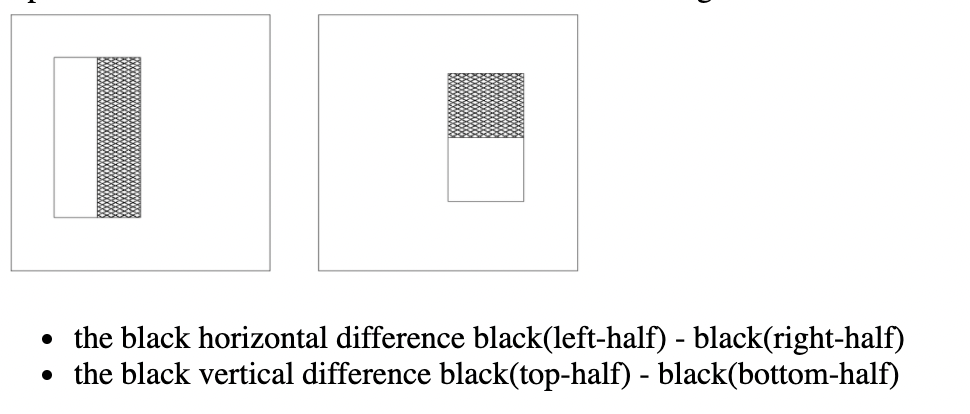

You will need to implement efficiently a method to compute the black amount (number of pixels) in a rectangle, essentially a procedure black(rectangle). Make sure you follow the idea presented in notes : first compute all black (rectangle OBCD) with O fixed corner of an image. These O-cornered rectangles can be computed efficiently with dynamic programming

```
for i=rows
for j=columns
    black(rectangle-diag(ODij)) = black(rectangle-diag(ODi,j-1)) + black(rectangle-diag(ODi-1,j))
                                - black(rectangle-diag(ODi-1,j-1)) + black(pixel Dij)
end for
end for
```

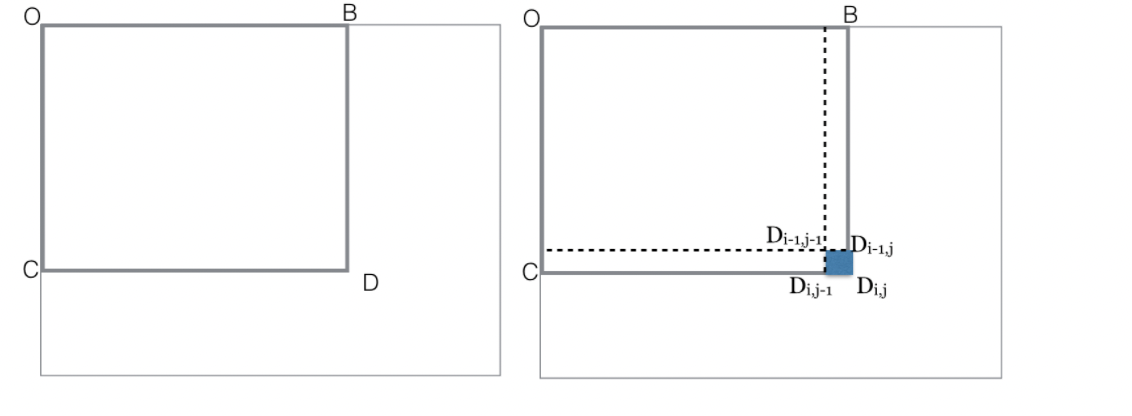

Assuming all such rectangles cornered at O have their black computed and stored, the procedure for general rectangles is quite easy:
```
black(rectangle ABCD) = black(OTYD) - black(OTXB) - black(OZYC) + black(OZXA)
```

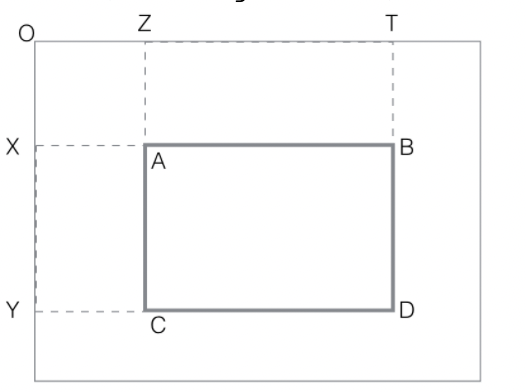

The last step is to compute the two feature (horizontal, vertical) values as differences:
```
vertical_feature_value(rectangle ABCD) = black(ABQR) - black(QRCD)
horizontal_feature_value(rectangle ABCD) = black(AMCN) - black(MBND)
```

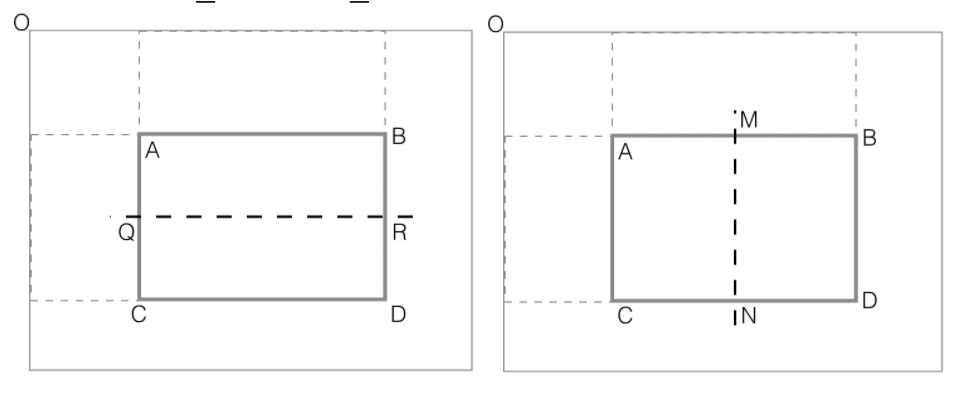

---
## **PROBLEM 3 : HARR Implementation**


In [ ]:
from math import floor as flr
from random import randrange
import numpy as np

# use this simple matrix to test
print('original image used for testing : ')
original_image = np.array([[1, 2, 3, 4, 5, 6],
                           [7, 8, 9, 10, 11, 12],
                           [13, 14, 15, 16, 17, 18],
                           [19, 20, 21, 22, 23, 24],
                           [25, 26, 27, 28, 29, 30],
                           [31, 32, 33, 34, 35, 36]])
# print(original_image)


# a, b, c, d are the coordinates used to crop out the rectangle from an image array
# (a, b) are row, column indices of the upper left corner
# (c, d) are row, column indices of the lower right corner
def black(a, b, c, d, original_image) -> int:
    if a > c or a < 0 or c > original_image.shape[0]:
        raise Exception("invalid rect row parameters")
    if b > d or b < 0 or d > original_image.shape[0]:
        raise Exception("invalid rect col parameters")
    crop = original_image[b: d, a: c]
    # print( 'corners of rectangle :', '(', a , ',' , b ,') | ', '(', c, ',' , d,')' )
    # print (crop)
    # print( 'quantity of black : ', np.sum(crop), '\n\n\n')
    return np.sum(crop)
# print(black(0, 0, 0, 6, original_image))


def store_opt(original_image: np.array, unit: int) -> dict:
    opt = {}

    x_iter = flr(original_image.shape[0] / unit) + 1
    y_iter = flr(original_image.shape[1] / unit) + 1

    for i in (range(x_iter)):
        opt[str([0, 0, i * unit, 0])] = 0
    for j in (range(x_iter)):
        opt[str([0, 0, 0, j * unit])] = 0

    for i in (range(x_iter)[1:]):
        for j in (range(y_iter)[1:]):
            # print(i * unit, j * unit)
            top_rect = opt.get(str([0, 0, i * unit, (j * unit - unit)]))
            bottom_rect = opt.get(str([0, 0, (i * unit - unit), j * unit]))
            corner_rect = opt.get(str([0, 0, (i * unit - unit), (j * unit - unit)]))

            # print('top_rect', top_rect)
            # print('bottom_rect', bottom_rect)
            # print('corner_rect', corner_rect)

            tiny_rect = black((i * unit - unit), (j * unit - unit), i * unit, j * unit, original_image)
            # print(tiny_rect)
            opt[str([0, 0, i * unit, j * unit])] = (top_rect + bottom_rect) - corner_rect + tiny_rect
            # print('hello')
    return opt


# rect is a list defining the coordinates of the two diagnoals
def find_rect_score(rect: list, opt: dict) -> int:
    a = rect[0];
    b = rect[1];
    c = rect[2];
    d = rect[3]

    big_rect = opt.get(str([0, 0, c, d]))
    top_rect = opt.get(str([0, 0, c, b]))
    bottom_rect = opt.get(str([0, 0, a, d]))
    corner_rect = opt.get(str([0, 0, a, b]))

    # print('\n\nfind_rect_score : ', a, b, c, d)
    # print('big_rect :', big_rect)
    # print('top_rect :', top_rect)
    # print('bottom_rect :', bottom_rect)
    # print('corner_rect :', corner_rect)
    # print('\n\n')

    crop = big_rect - (top_rect + bottom_rect) + corner_rect
    return np.sum(crop)


def get_hor_rect_score(rect: list, opt: dict) -> int:
    a = rect[0];
    b = rect[1];
    c = rect[2];
    d = rect[3]

    first_half_rect = find_rect_score([a, b, a + int((c-a) / 2), d], opt)
    second_half_rect = find_rect_score([a + int((c-a) / 2), b, c, d], opt)
    return first_half_rect - second_half_rect


def get_ver_rect_score(rect: list, opt: dict) -> int:
    a = rect[0];
    b = rect[1];
    c = rect[2];
    d = rect[3]

    first_half_rect = find_rect_score([a, b, c, b + int((d-b) / 2)], opt)
    second_half_rect = find_rect_score([a, b+ int((d-b) / 2), c, d], opt)
    return first_half_rect - second_half_rect


original image used for testing : 


Train HARR using 50 horizontal and 50 vertical rectangles as features.

In [ ]:

from random import randrange
from keras.datasets import mnist 
import itertools

# load mnist data
(mnist_train, mnist_train_labels), (mnist_test, mnist_test_labels) = mnist.load_data()
original_image = mnist_train


# This function is going to choose randomly generated horizontal rectangles and verticle Rectangles
def define_rectangles(dim_x, dim_y, unit) -> list:
    rect_list = []
    while True:
        a = randrange(4, 20)
        b = randrange(2, 16)
        c = randrange(8, 24)
        d = randrange(12, 26)
        width = (c - a)
        length = (d - b)
        area = length * width
        if area > 130 and area < 170:
            if a%2 ==0 and b%2 ==0:
                if width % 4 == 0 and length % 4 == 0 and width >= 4 and length >= 4:
                    rect_list.append([a, b, c, d])
        if len(rect_list) == 50: break
    return rect_list


def create_features(mnist_train: np.array, harr_rectangles: list) -> np.array:
    harr_rectangles.sort()
    harr_rectangles = list(k for k, _ in itertools.groupby(harr_rectangles))
    # print(len(harr_rectangles))
    mnist_harr_train = []
    for image in mnist_train:
        # print(image.shape)
        opt = store_opt(image, 2)
        image_features = []
        for rect in harr_rectangles:
            # print('\n', rect)
            image_features.append(get_hor_rect_score(rect, opt))
            image_features.append(get_ver_rect_score(rect, opt))
        mnist_harr_train.append(image_features)
    return np.array(mnist_harr_train)



In [ ]:

import numpy as np

harr_train_rectangles = define_rectangles(mnist_train[0].shape[0], mnist_train[0].shape[1], 2)
harr_train = np.array(create_features(mnist_train, harr_train_rectangles))


In [ ]:

from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix

#using the first 3000 training as training data and labels
l=lr(solver='lbfgs', max_iter=100000).fit( harr_train[0:3000], mnist_train_labels[0:3000])


# using the 3000:6000 of training as testing data and labels
results = l.predict(harr_train)
cm = confusion_matrix(mnist_train_labels, results)
print('Confusion Matrix\n', '\n', cm, '\n')
score = l.score(harr_train, mnist_train_labels)
print("logistic prediction using HARR : ", score , '\n')


Confusion Matrix
 
 [[294   0   0   3   1   5   1   2   1   0]
 [  0 320   0   2   0   4   0   3   1   2]
 [  1   6 233   4   8   4   8   5  12   1]
 [  0   5   5 276   0  18   0   5   3   1]
 [  0   1   3   1 266   2   4   0   3  18]
 [  5   6   3  11   6 189   2   0  10   8]
 [  5   3   2   0   4   7 276   0   5   0]
 [  1   2  10   4   3   0   0 282   1  19]
 [  2   1  11  16   5  12   6   1 230   6]
 [  5   4   3   3   3   1   1  16   3 275]] 

logistic prediction using HARR :  0.8803333333333333 

